In [1]:
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

In [2]:
iris = datasets.load_iris()
x = iris["data"][:, (2,3)]
y = (iris["target"] == 2).astype("float64")

In [3]:
svm_clf = Pipeline((
    ("scaler", StandardScaler()),
    ("linear_svc", LinearSVC(C=1, loss="hinge"))
))

In [4]:
svm_clf.fit(x, y)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('linear_svc', LinearSVC(C=1, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=None, tol=0.0001, verbose=0))])

In [5]:
svm_clf.predict([[5.5, 1.7]])

array([ 1.])

In [14]:
def separate(X, Y):
    """
    Inputs:
    -> X - feature matrix
    -> Y - labels vector
    Returns:
    -> positive - matrix holding features of positive samples
    -> negative - matrix holding features of negative samples
    """
    positive = []
    negative = []

    for i, label in enumerate(Y):

        if label:
            positive.append(X[i])
        else:
            negative.append(X[i])
    
    return positive, negative

In [17]:
from sklearn.datasets import make_moons
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
%matplotlib inline

In [70]:
polynomial_svm_clf = Pipeline((
    ('poly_features', PolynomialFeatures(degree=4)),
    ('scaler', StandardScaler()),
    ('svm_clf', LinearSVC(C=10, loss='hinge'))
))

In [71]:
X,y = make_moons(noise=0.12)
polynomial_svm_clf.fit(X,y)
positive, negative = separate(X,y)

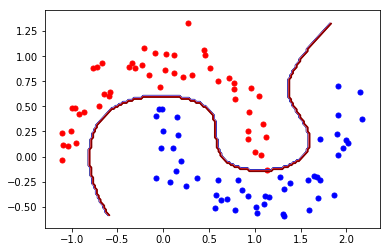

In [72]:
#stepsize in the mesh
h = .02
#creating a meshgrid
x_min, x_max = X[:,0].min(), X[:,0].max()
y_min, y_max = X[:,1].min(), X[:,1].max()
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
#predict the labels of the points in the meshgrid
Z = polynomial_svm_clf.predict(np.c_[xx.ravel(),yy.ravel()])
Z = Z.reshape(xx.shape)

#plotting our dataset and decision boundary
plt.contour(xx, yy, Z, cmap=plt.cm.seismic)
plt.scatter([sample[0] for sample in positive], [sample[1] for sample in positive], marker='.', c='b', s=100)
plt.scatter([sample[0] for sample in negative], [sample[1] for sample in negative], marker='.', c='r', s=100)
plt.show()

In [89]:
from sklearn.svm import SVC

poly_kernel_svm_clf = Pipeline((
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="poly", degree=3, coef0=10, C=5))
))

In [90]:
poly_kernel_svm_clf.fit(X,y)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svm_clf', SVC(C=5, cache_size=200, class_weight=None, coef0=10,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

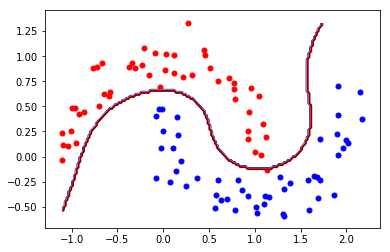

In [91]:
#stepsize in the mesh
h = .02
#creating a meshgrid
x_min, x_max = X[:,0].min(), X[:,0].max()
y_min, y_max = X[:,1].min(), X[:,1].max()
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
#predict the labels of the points in the meshgrid
Z = poly_kernel_svm_clf.predict(np.c_[xx.ravel(),yy.ravel()])
Z = Z.reshape(xx.shape)

#plotting our dataset and decision boundary
plt.contour(xx, yy, Z, cmap=plt.cm.seismic)
plt.scatter([sample[0] for sample in positive], [sample[1] for sample in positive], marker='.', c='b', s=100)
plt.scatter([sample[0] for sample in negative], [sample[1] for sample in negative], marker='.', c='r', s=100)
plt.show()